<a href="https://colab.research.google.com/github/everval/AQM2021/blob/main/Lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs
import random as rnd #Package for random number generation
from scipy.stats import norm #Import the Normal distribution from the scipy.stats package
from scipy.stats import t #Import the Normal distribution from the scipy.stats package

Finishing the Simpsons example from last week.

In [ ]:
from google.colab import files
uploaded = files.upload()

simpsons = pd.read_csv('Simpsons_ratings.csv') #Load the data
print(simpsons)
plt.hist(simpsons['Rating'], bins=10, density=True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1
plt.title('Simpsons Ratings')

mean_simpsons =   #Compute the sample mean
std_simpsons =   #Compute the sample standard deviation

display([mean_simpsons,std_simpsons])

We construct the confidence interval for the sample mean of the Simpsons where we do not know the standard deviation.

The t distribution is symmetrical, so we need to find $Z_{\alpha/2}$ such that $(1-\alpha/2)$ of the distribution is above it. Or, given symmetry, that $(1-\alpha/2)$ of the distribution is below it.

In [ ]:
n1 =  #Finding the number of ratings or sample size
display(n1)  

z_alpha =  #Percent point function: it finds the value such that 
                #the percentage is achieved.
display(z_alpha)

The critical value, $Z_{\alpha/2}$, depends on the degrees of freedom.

In [ ]:
vals = np.arange(-6,6,0.01)   #Generate grid for the CI
deg_free = 

plt.title('t Distribution')
 #Adding the theoretical density

crit_val = #Obtaining the critical value

display(crit_val)

crit_region = np.arange(crit_val,6,0.01)
 #Paint the area
plt.show()

For such a *large* sample size, $Z_{\alpha/2}$ is almost the same value for the t distribution than for the Normal.

In [ ]:
  #Percent point function for the normal distribution

We compute the confidence interval.

In [ ]:
mean_sample_simpsons =
std_sample_simpsons =   

display([mean_sample_simpsons,std_sample_simpsons])

lim_inf_simpsons =   #CI
lim_sup_simpsons = 

display([lim_inf_simpsons, lim_sup_simpsons])

Which shows that for 95% of the samples that we *randomly* select, the sample mean is going to be between 7.13 and 7.26.

# Hypothesis Tests 

Steps to conduct a hypothesis tests

*   Set up the null and alternative hypothesis. 

*   Decide the level of significance required for this particular case and determine the critical value.

*   Take a sample(s) and calculate the relevant parameters.

*   Compare the calculated test statistic and the critical value. There are now only two situations:

    a. The test statistic is in the tail: Cannot Accept the null

    b. The test statistic is not in the tail: Cannot Reject the null

*   Reach a conclusion. 

# Hypothesis Testing with One Sample

On the previous lectures, without indicating it, we have taken most of the steps in a hypothesis test for our Simpsons data.

The only thing that we forgot was to **formally** write our null hypothesis. 

This implies that we should *quantify* what is a good show. That means, we should decide on a rating such that if the Simpsons are above that, we call it a good show.

Of course, the result of the test could vary depending on the number we settle on.

Suppose we call it a good show if it gets a rating of 7.5 or above. Our null hypothesis would be then:

> $H_0: \overline{SimpsonsRatings}\geq 7.5$ 

against the alternative

> $H_a: \overline{SimpsonsRatings}< 7.5$ 

Notice that this is a **one-tailed** test. 

First, we construct the statistic of the test:
$$t_0 = \frac{\overline{SimpsonsRatings}-7.5}{\frac{s}{\sqrt{n}}},$$

where $s$ is our estimate of the standard deviation.


In [ ]:
t_0 =   #Compute the tests statistic
display(t_0)

Which we compare against the critical value and hence we reject the null.

In [ ]:
z_alpha_1side =  #Critical value from the percent point function

display(z_alpha_1side)

Alternatively, or additionally, we can compute the **p-value** of the test by computing the probability of observing the value in the sample under the assumption that the rating is 7.5

In [ ]:
   #Evaluating the p-value

# Type I and Type II Errors

Given that we are dealing with probabilities and uncertain outcomes, when we perform a hypothesis tests, there are four possible outcomes. 

They are shown in the table below:

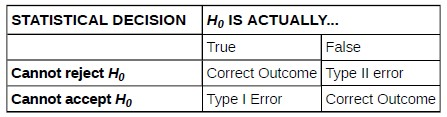

With real data, we can never know if we are commiting one of the errors. 

We can use theoretical or simulated data to illustrate the outcomes.

In the coin game, we can compute the distribution of the sample mean under the assumption of a fair coin and an unfair coin.

Doing so, allows us to evaluate the probability of commiting errors type I or II for the hypothesis test:



> $H_0$: The coin is fair; that is $p=0.5$

against the alternative

> $H_a$: It is an unfair coin; that is $p\neq0.5$



Frotm the CLT, assuming we play the game 100 times, we can obtain the distribution of the sample mean under the null.

$$\bar{X}\sim N(0.5,\frac{\sqrt{0.25}}{\sqrt{100}})$$

And we compare against the distribution of an unfair coin where $p=0.52$.

$$\bar{X}\sim N(0.52,\frac{\sqrt{0.52*0.48}}{\sqrt{100}})$$

In [ ]:
p_unfair = 

mean_fair = 
std_fair = 

mean_unfair = 
std_unfair = 

vals = np.arange(0.3,0.7,0.005)  #Making a new grid

nor_vals = norm.pdf(vals,loc=mean_fair,scale=std_fair) #Evaluating the Normal
nor_vals_unfair =  #Evaluating the Normal

plt.plot(vals,nor_vals,color="blue",linestyle="--") #Adding the theoretical density
plt.plot(vals,nor_vals_unfair,color="red",linestyle="--") #Adding the theoretical density
plt.show()

We can compute the probabilities of observing a particular outcome under the null and the alternative.

Error Type I

Observing a mean of 0.526

In [ ]:
 #Adding the theoretical density for the fair coin
 #Adding the theoretical density for the unfair coin
 #A vertical line at the observed value
plt.show()

display()  #The probability of the coin coming from the distribution
                                                        #of the fair coin
display(1-norm.cdf(0.526,loc=mean_unfair,scale=std_unfair))  #of the unfair coin

Error Type II

Observing a mean of 0.48

In [ ]:
plt.plot(vals,nor_vals,color="blue",linestyle="--") #Adding the theoretical density
plt.plot(vals,nor_vals_unfair,color="red",linestyle="--") #Adding the theoretical density
  #A vertical line at the observed value
plt.show()

display(norm.cdf(0.48,loc=mean_fair,scale=std_fair))
display()

# Hypothesis Testing with Two Samples

There are scenarios where we are interested in testing whether the mean of one group is different than another. Examples are the effect of a particular treatment or vaccine, better outcomes for students preparing for the exam, etc.

Let $\mu_1$ be the mean of the first group and $\mu_2$ be the mean of the second group. We are interested in testing hypothesis of the form:


> $H_0$: Equal means; $\mu_1=\mu_2$

against the alternative

> $H_a$: Different means; $\mu_1\neq\mu_2$

As before, we do not know the true/theoretical means, but we use a sample to estimate them. The test would thus look at the difference between $\bar{X}_1-\bar{X}_2$.

Given that we are once again dealing with sample means, the CLT applies for both samples. 

Hence, we know that 
$$\bar{X}_1\sim N(\mu_1,\frac{\sigma_1}{\sqrt{n_1}}),$$

and

$$\bar{X}_2\sim N(\mu_2,\frac{\sigma_2}{\sqrt{n_2}}),$$

where $n_1$ and $n_2$ are the sample sizes for group 1 and 2, respectively.

For the test we use the property that sum (or differences) of Normal variables are again Normal.

As before, if we know the true standard deviations, the statistic follows a Normal distribution.

If, on the more general case, we estimate the standard deviations using the sample, the test statistic follows a t-distribution:
$$t_0 = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}},$$
with degrees of freedom given by:
$$df = \frac{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^2}{\frac{1}{n_1-1}(\frac{s_1^2}{n_1})^2+\frac{1}{n_2-1}(\frac{s_2^2}{n_2})^2}.$$

We can finally test the hypothesis on whether Simpsons' ratings are different than Family Guy's ratings. 

We load Family Guy's data and compute the mean and standard deviation of the sample mean.

In [ ]:
from google.colab import files
uploaded = files.upload()

fm =) #Load the data
print(fm)

mean_fm =   #Compute the sample mean
std_fm =  #Compute the sample standard deviation
n2 =  #Compute the sample size

mean_sample_fm =  #Compute the mean of the distribution of xbar
std_sample_fm =   #Compute the std of the distribution of xbar

display([mean_sample_fm,std_sample_fm])

We construct the statistic for the test.

In [ ]:
t_diff = ( mean_sample_simpsons-mean_sample_fm ) /  np.sqrt(std_sample_simpsons**2+std_sample_fm**2)
display(t_diff)

0.5602527074044601

Obtaining the degrees of freedom.

In [ ]:
deg_free_diff_num = #Numerator of the degrees of freedom
deg_free_diff_den = #Denominator of the degrees of freedom

deg_free_diff =   #Ratio
display(deg_free_diff)

And the critical value for the test.

Which tells us that we cannot reject the null of equal ratings.

Alternatively, we can compute the p-value.